In [1428]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [1429]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [1430]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [1431]:
train.shape

(9366, 18)

In [1432]:
train.describe()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,return
count,9.366000e+03,9.364000e+03,9366.000000,8892.000000,9.364000e+03,9.366000e+03,9.366000e+03,9366.000000
mean,2.011706e+07,1.019740e+08,0.009383,0.998066,1.018914e+08,2.011706e+07,2.011770e+07,0.014100
std,3.052996e+04,1.928066e+08,0.013298,1.457977,1.927472e+08,3.052372e+04,3.060900e+04,0.020549
min,2.004041e+07,1.100000e+00,-0.003740,-0.667095,1.099698e+00,2.004072e+07,2.004071e+07,-0.009600
25%,2.010020e+07,2.763200e+07,0.000980,0.244490,2.761285e+07,2.010020e+07,2.010023e+07,0.003000
50%,2.011120e+07,5.517050e+07,0.004390,0.531983,5.512056e+07,2.011120e+07,2.011121e+07,0.005400
75%,2.014071e+07,1.144632e+08,0.013510,1.109959,1.144459e+08,2.014071e+07,2.014083e+07,0.014520
max,2.017103e+07,1.320000e+10,0.050880,6.379137,1.320000e+10,2.017103e+07,2.017103e+07,0.778441


In [1433]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 18 columns):
portfolio_id      9366 non-null object
desk_id           5701 non-null object
office_id         9366 non-null object
pf_category       9366 non-null object
start_date        9366 non-null int64
sold              9364 non-null float64
country_code      9366 non-null object
euribor_rate      9366 non-null float64
currency          9366 non-null object
libor_rate        8892 non-null float64
bought            9364 non-null float64
creation_date     9366 non-null int64
indicator_code    3667 non-null object
sell_date         9366 non-null int64
type              9366 non-null object
hedge_value       3665 non-null object
status            6282 non-null object
return            9366 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 1.3+ MB


In [1434]:
train.isnull().sum(),test.isnull().sum()

(portfolio_id         0
 desk_id           3665
 office_id            0
 pf_category          0
 start_date           0
 sold                 2
 country_code         0
 euribor_rate         0
 currency             0
 libor_rate         474
 bought               2
 creation_date        0
 indicator_code    5699
 sell_date            0
 type                 0
 hedge_value       5701
 status            3084
 return               0
 dtype: int64, portfolio_id         0
 desk_id           1948
 office_id            0
 pf_category          0
 start_date           0
 sold                 0
 country_code         0
 euribor_rate         0
 currency             0
 libor_rate         265
 bought               0
 creation_date        0
 indicator_code    2851
 sell_date            0
 type                 0
 hedge_value       2851
 status            1457
 dtype: int64)

In [1435]:
train.head(10)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496
5,PF00001008,DSK00001006,OFF00001001,A,20040707,48741000.0,T,0.02074,USD,2.332216,4.865127e+07,20040726,NaN,20040810,A,NaN,NaN,0.02490
6,PF00001010,DSK00001009,OFF00001001,A,20040706,60593500.0,T,0.02074,USD,2.332216,6.048181e+07,20040726,NaN,20040809,A,NaN,NaN,0.02493
7,PF00001011,DSK00001009,OFF00001002,B,20040706,134200000.0,T,0.02074,USD,2.332216,1.339526e+08,20040726,NaN,20040809,B,NaN,NaN,0.02493
8,PF00001012,DSK00001010,OFF00001001,A,20040419,82929000.0,T,0.02074,USD,2.332216,8.250616e+07,20040726,NaN,20040720,A,NaN,NaN,0.02460
9,PF00001016,DSK00001014,OFF00001001,A,20040414,212476000.0,T,0.02074,USD,2.332216,2.114140e+08,20040727,NaN,20040713,A,NaN,NaN,0.02466


In [1436]:
def parse_date(dat):
    return str(dat[:4]+'-'+dat[4:6]+'-'+dat[6:])

In [1437]:
train['creation_date']=train['creation_date'].apply(lambda x:parse_date(str(x)))
train['start_date']=train['start_date'].apply(lambda x:parse_date(str(x)))
train['sell_date']=train['sell_date'].apply(lambda x:parse_date(str(x)))

test['creation_date']=test['creation_date'].apply(lambda x:parse_date(str(x)))
test['start_date']=test['start_date'].apply(lambda x:parse_date(str(x)))
test['sell_date']=test['sell_date'].apply(lambda x:parse_date(str(x)))

In [1438]:
train['creation_date'].head(),train['start_date'].head()

(0    2004-07-20
 1    2004-07-23
 2    2004-07-23
 3    2004-07-23
 4    2004-07-23
 Name: creation_date, dtype: object, 0    2004-07-20
 1    2004-07-09
 2    2004-07-23
 3    2004-06-09
 4    2004-06-09
 Name: start_date, dtype: object)

In [1439]:
train['creation_date']=pd.to_datetime(train['creation_date'])
train['start_date']=pd.to_datetime(train['start_date'])
train['sell_date']=pd.to_datetime(train['sell_date'])

test['creation_date']=pd.to_datetime(test['creation_date'])
test['start_date']=pd.to_datetime(test['start_date'])
test['sell_date']=pd.to_datetime(test['sell_date'])``

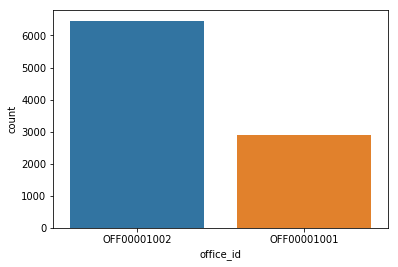

In [141]:
sns.countplot(train['office_id'])
plt.show()

In [1445]:
def plot(x=None, y=None, hue=None, data=None,name='',is_barplot=False,is_countplot=False,is_boxplot=False):
    data=pd.DataFrame(data)
    try:
        print(name,'\n')
        data[x].hist()
        plt.show()
    except:
        print('cannot plot histogram\n')
    if is_barplot:
        try:
            print(name,'\n')
            sns.barplot(x=x,y=y,hue=hue,data=data)
            plt.show()
        except:
            print('cannot plot barplot\n')
    if is_countplot:        
        try:
            print(name,'\n')
            plt.figure(figsize=(14,9))
            sns.countplot(data=data,hue=hue,x=x)
            plt.show()
        except:
            print('cannot plot countplot\n')
    if is_boxplot:        
        try:
            print(name,'\n')
            sns.boxplot(x=x,y=y,hue=hue,data=data)
            plt.show()
        except:
            print('cannot plot boxplot\n')    

In [1446]:
def plotHeatMap(df, size=(16,9),an=True):
    plt.figure(figsize=size)
    cmap = plt.cm.viridis
    sns.heatmap(df.corr(),cmap=cmap,linewidths=0.1,vmax=1, linecolor="white", square=True,annot=an)
    plt.show()

office_id 

cannot plot histogram

office_id 

cannot plot barplot

office_id 



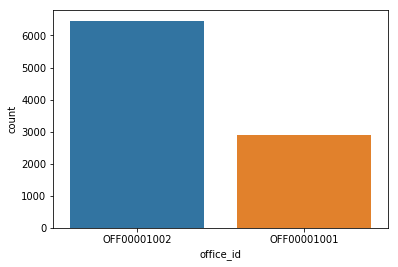

office_id 

cannot plot boxplot



In [149]:
plot(x='office_id',data=train,is_barplot=True,is_boxplot=True,is_countplot=True,name='office_id')

desk_id 

cannot plot histogram

desk_id 

cannot plot barplot

desk_id 



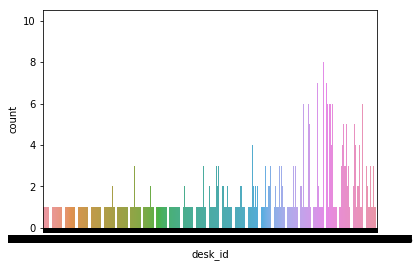

desk_id 

cannot plot boxplot



In [150]:
plot(x='desk_id',data=train,is_barplot=True,is_boxplot=True,is_countplot=True,name='desk_id')

In [157]:
type(train['pf_category'].values[0]) is str

True

portfolio_id 

cannot plot histogram

portfolio_id 

cannot plot barplot

portfolio_id 



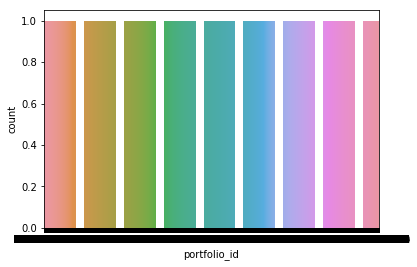

portfolio_id 

cannot plot boxplot

desk_id 

cannot plot histogram

desk_id 

cannot plot barplot

desk_id 



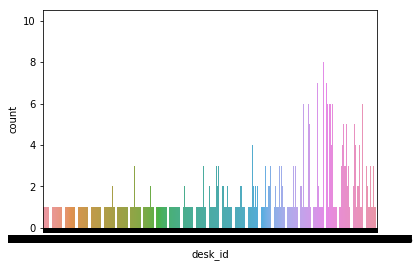

desk_id 

cannot plot boxplot

office_id 

cannot plot histogram

office_id 

cannot plot barplot

office_id 



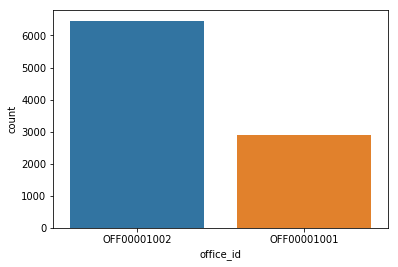

office_id 

cannot plot boxplot

pf_category 

cannot plot histogram

pf_category 

cannot plot barplot

pf_category 



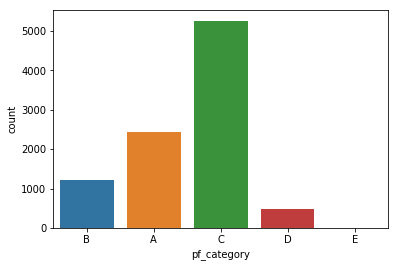

pf_category 

cannot plot boxplot

country_code 

cannot plot histogram

country_code 

cannot plot barplot

country_code 



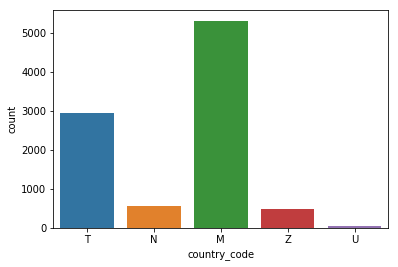

country_code 

cannot plot boxplot

currency 

cannot plot histogram

currency 

cannot plot barplot

currency 



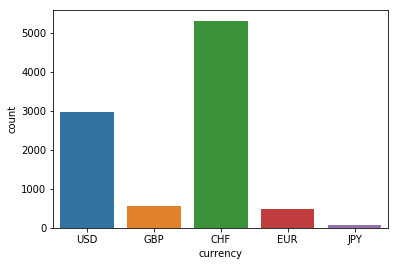

currency 

cannot plot boxplot

type 

cannot plot histogram

type 

cannot plot barplot

type 



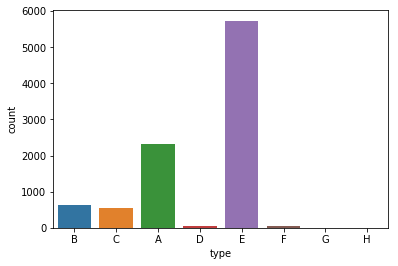

type 

cannot plot boxplot



In [158]:
for i in train.columns:
    if type(train[i].values[0]) is str:
        plot(x=i,data=train,is_barplot=True,is_boxplot=True,is_countplot=True,name=i)

In [938]:
len(train['portfolio_id'].unique())

9366

In [939]:
len(train[train['type']=='D'])

47

In [940]:
train[train['type']=='H']

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,creation_month,creation_year,creation_day,start_month,start_year,start_day,sell_month,sell_year,sell_day
7762,PF00012796,NaN,OFF00001002,B,2015-05-15,22000000.0,Z,-0.00042,EUR,0.156735,2.195557e+07,2015-05-13,True,2015-06-15,H,False,True,0.02820,0.958924,2015,0.420167,0.958924,2015,0.650288,0.279415,2015,0.650288
7864,PF00012900,NaN,OFF00001002,B,2015-06-15,22000000.0,Z,-0.00057,EUR,0.172437,2.195700e+07,2015-06-11,True,2015-07-15,H,False,True,0.02820,0.279415,2015,0.999990,0.279415,2015,0.650288,0.656987,2015,0.650288
7924,PF00013242,NaN,OFF00001002,B,2015-09-17,22000000.0,Z,-0.00099,EUR,0.141111,2.195395e+07,2015-09-15,True,2015-10-19,H,False,True,0.02832,0.412118,2015,0.650288,0.412118,2015,0.961397,0.544021,2015,0.149877
8008,PF00012910,NaN,OFF00001002,B,2015-06-18,33000000.0,Z,-0.00057,EUR,0.172437,3.293121e+07,2015-06-16,True,2015-07-20,H,False,True,0.02820,0.279415,2015,0.287903,0.279415,2015,0.750987,0.656987,2015,0.912945
8177,PF00013444,NaN,OFF00001002,B,2015-11-19,22000000.0,Z,-0.00119,EUR,0.068843,2.195453e+07,2015-11-17,True,2015-12-21,H,False,True,0.02796,0.999990,2015,0.961397,0.999990,2015,0.149877,0.536573,2015,0.836656
8787,PF00013148,NaN,OFF00001002,B,2015-08-17,22000000.0,Z,-0.00078,EUR,0.151360,2.195557e+07,2015-08-13,True,2015-09-17,H,False,True,0.02820,0.989358,2015,0.420167,0.989358,2015,0.961397,0.412118,2015,0.961397
9242,PF00013033,NaN,OFF00001002,B,2015-07-20,33000000.0,Z,-0.00064,EUR,0.167049,3.293307e+07,2015-07-16,True,2015-08-20,H,False,True,0.02832,0.656987,2015,0.287903,0.656987,2015,0.912945,0.989358,2015,0.912945


sold 



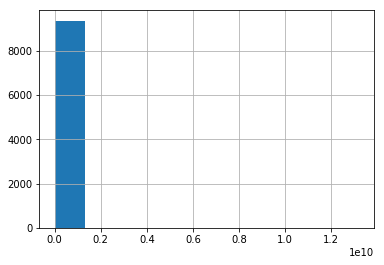

sold 



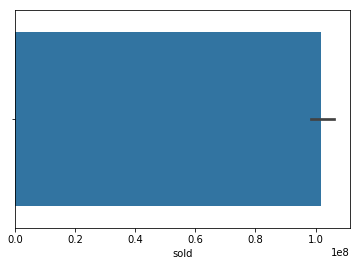

sold 

cannot plot countplot

sold 



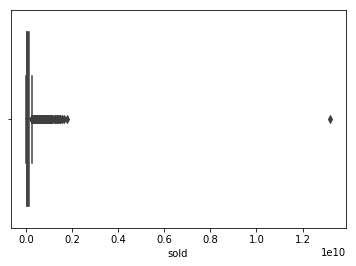

euribor_rate 



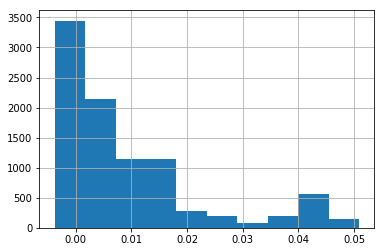

euribor_rate 



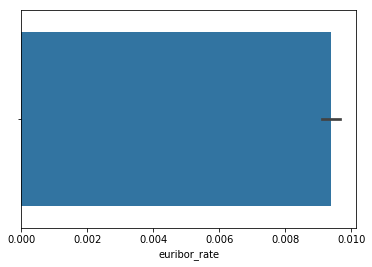

euribor_rate 



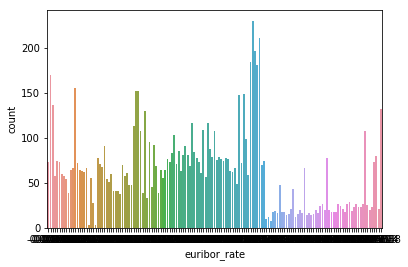

euribor_rate 



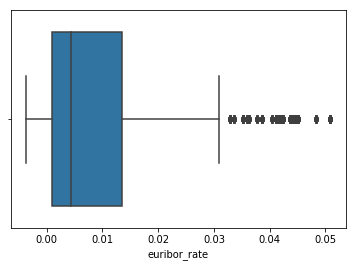

libor_rate 



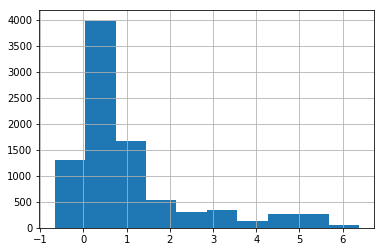

libor_rate 



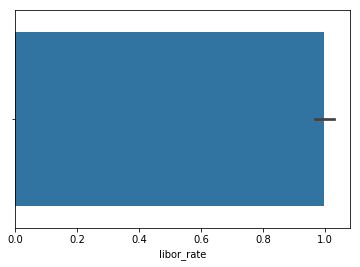

libor_rate 



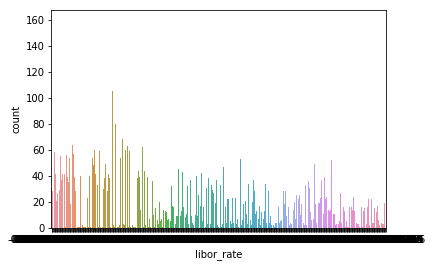

libor_rate 



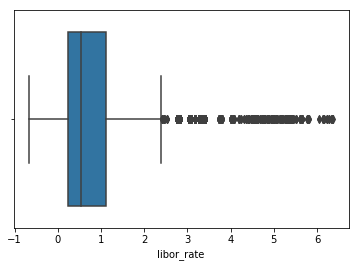

bought 



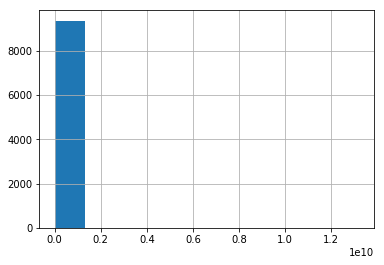

bought 



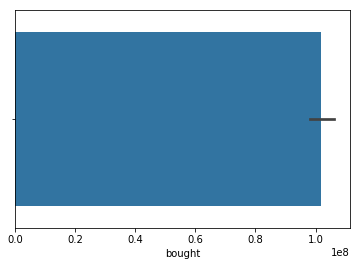

bought 



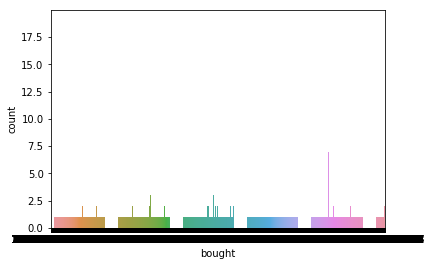

bought 



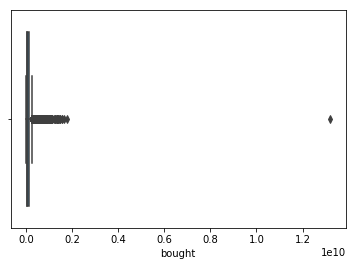

return 



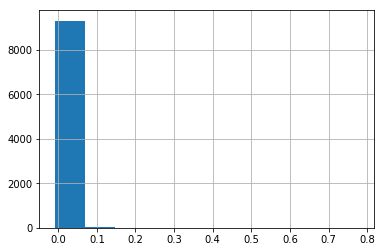

return 



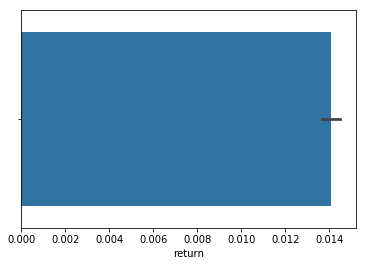

return 



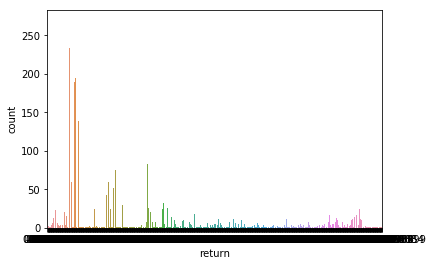

return 



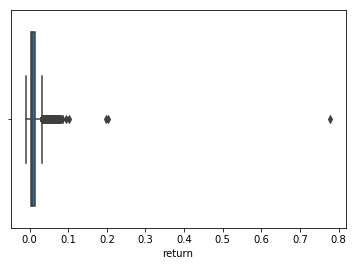

creation_month 



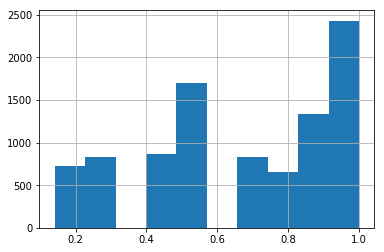

creation_month 



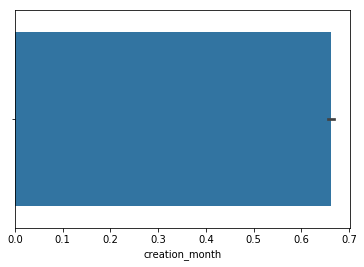

creation_month 



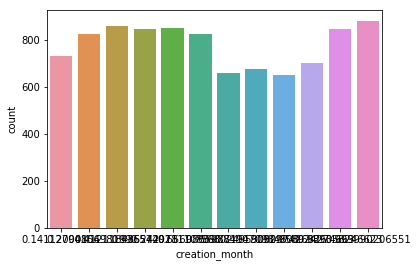

creation_month 



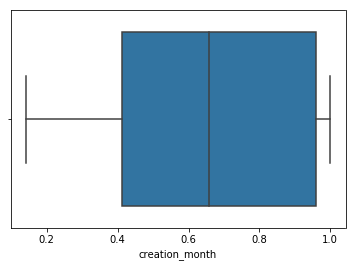

creation_year 



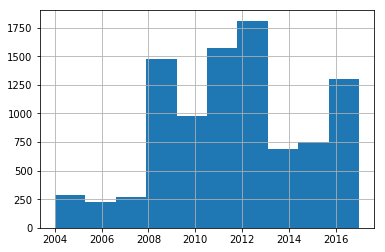

creation_year 



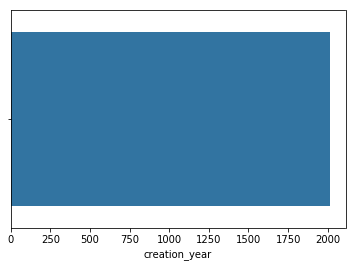

creation_year 



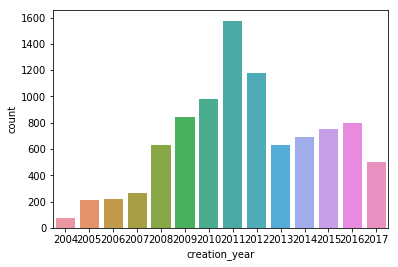

creation_year 



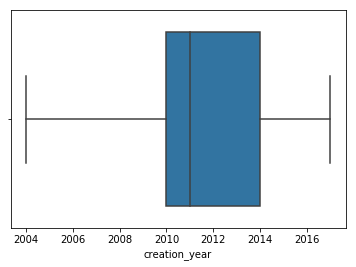

creation_day 



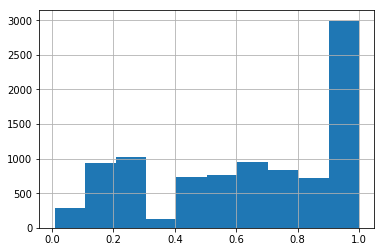

creation_day 



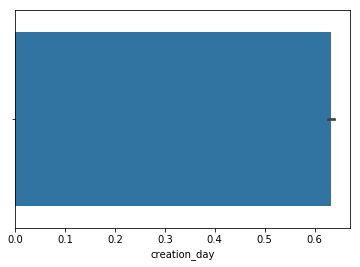

creation_day 



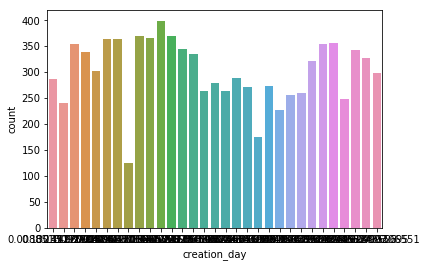

creation_day 



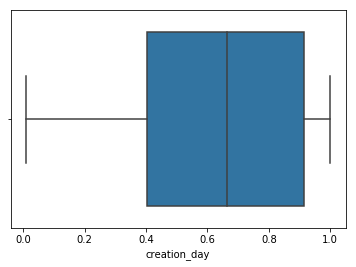

start_month 



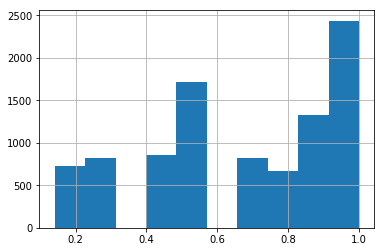

start_month 



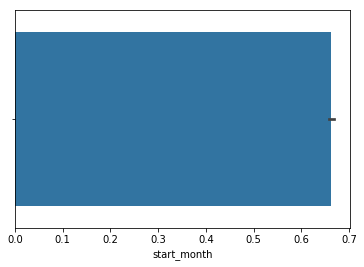

start_month 



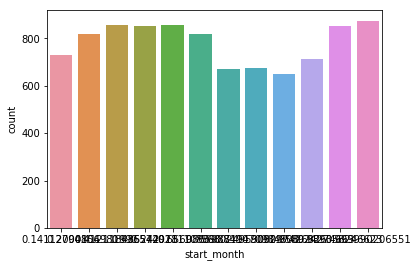

start_month 



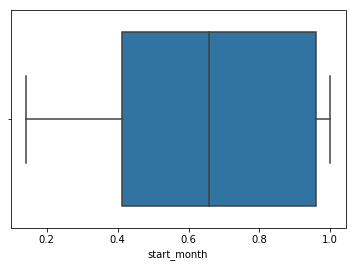

start_year 



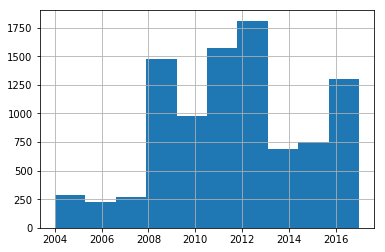

start_year 



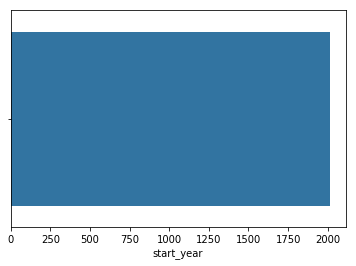

start_year 



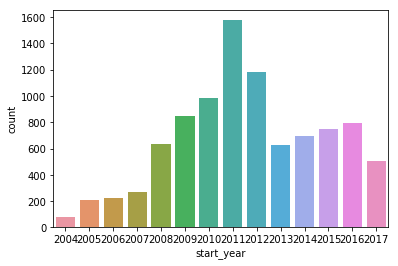

start_year 



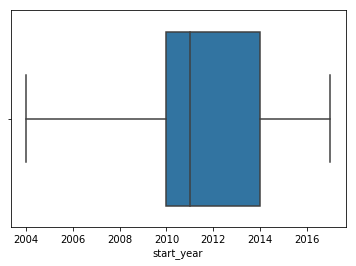

start_day 



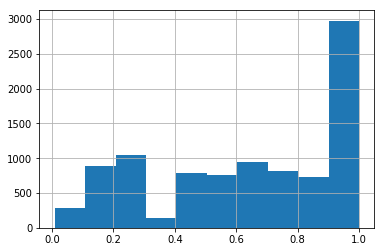

start_day 



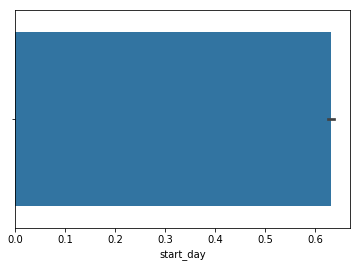

start_day 



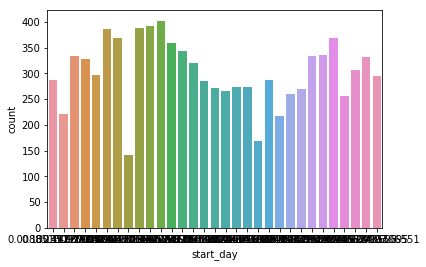

start_day 



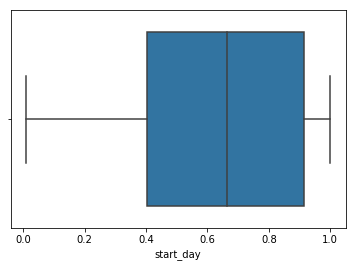

sell_month 



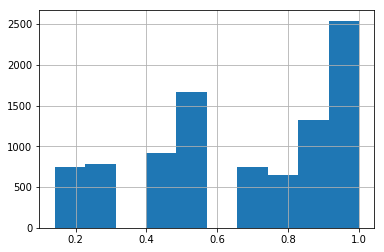

sell_month 



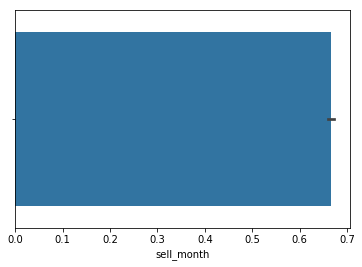

sell_month 



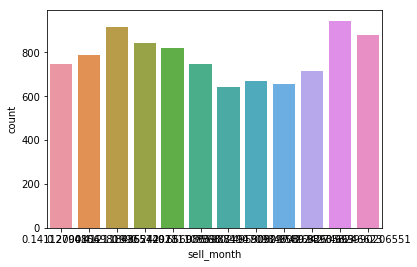

sell_month 



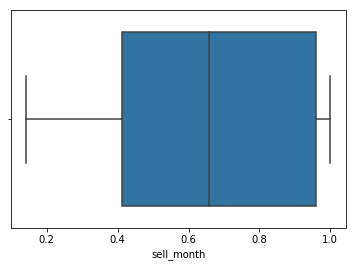

sell_year 



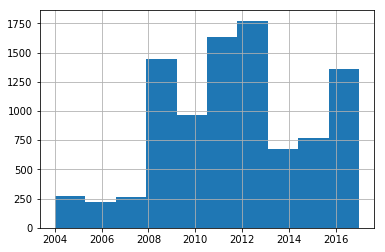

sell_year 



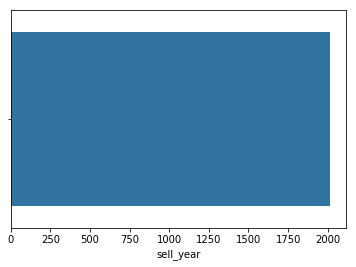

sell_year 



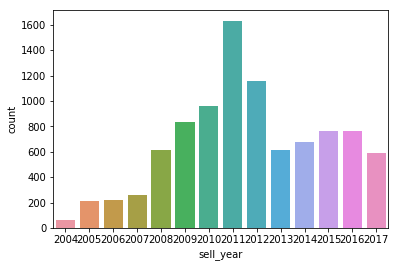

sell_year 



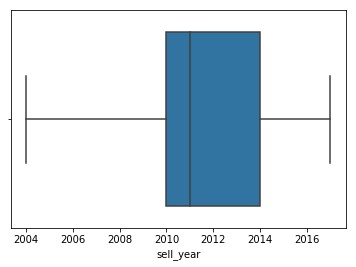

sell_day 



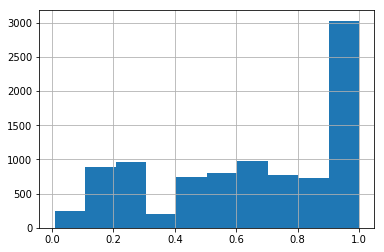

sell_day 



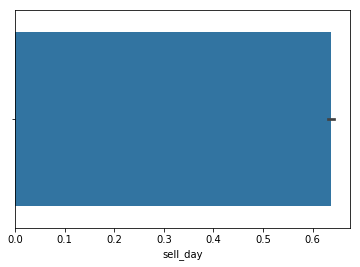

sell_day 



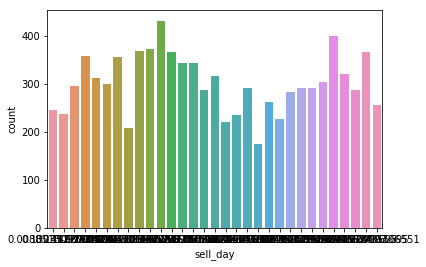

sell_day 



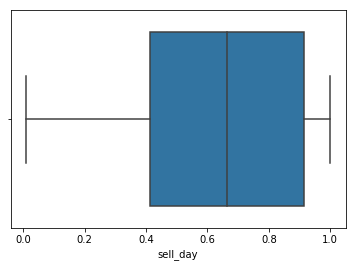

In [182]:
for i in train.columns:
    if train[i].dtype==np.int64 or train[i].dtype==np.float64:
        plot(x=i,data=train,is_barplot=True,is_boxplot=True,is_countplot=True,name=i)

In [1447]:
def factor_plot(x=None,y=None,data=None):
    data=pd.DataFrame(data)
    sns.factorplot(x=x,y=y,data=data,size=14)
    plt.show()

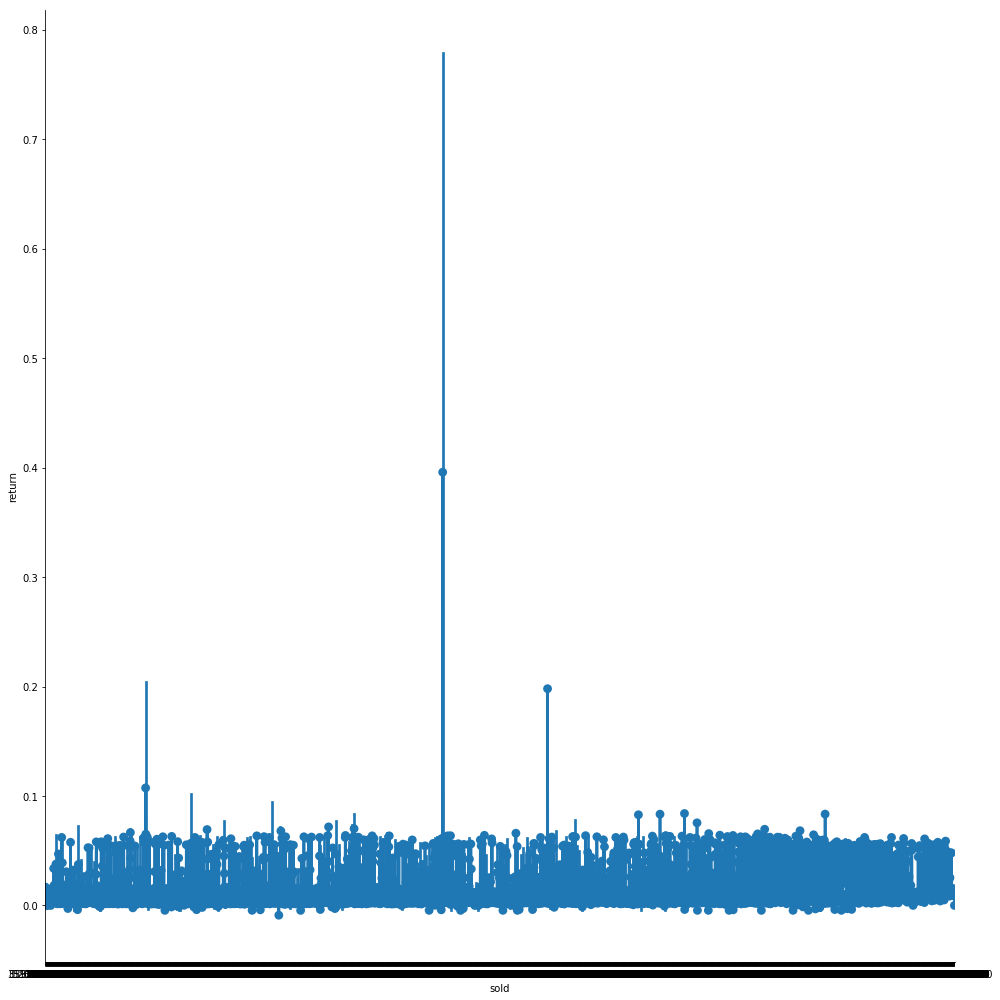

In [194]:
factor_plot(x='sold',y='return',data=train)

# NaN removal/Teatment

In [1448]:
for i in ['pf_category','country_code','currency','indicator_code','type','hedge_value','status']:
    print(i,'  ',set(train[i]),' ',train[i].isnull().sum(),'  ',set(test[i]),' ',test[i].isnull().sum())

pf_category    {'A', 'D', 'C', 'B', 'E'}   0    {'A', 'B', 'D', 'C'}   0
country_code    {'N', 'U', 'Z', 'M', 'T'}   0    {'N', 'U', 'Z', 'M', 'T'}   0
currency    {'CHF', 'EUR', 'USD', 'GBP', 'JPY'}   0    {'CHF', 'EUR', 'USD', 'GBP', 'JPY'}   0
indicator_code    {nan, True}   5699    {nan, True}   2851
type    {'A', 'D', 'F', 'C', 'G', 'B', 'E', 'H'}   0    {'A', 'D', 'F', 'C', 'B', 'E', 'H'}   0
hedge_value    {nan, True, False}   5701    {nan, True, False}   2851
status    {nan, True}   3084    {nan, True}   1457


In [1449]:
len(train[train['pf_category']=='E']),len(train[train['type']=='G'])
#remove both entries as both they may be outlier

(2, 1)

In [1450]:
train=train[train['pf_category']!='E']
train=train[train['type']!='G']

In [1451]:
train.shape,test.shape

((9363, 27), (4801, 26))

In [1452]:
(train['hedge_value'][train['pf_category']=='D']).isnull().sum()
#important insight : all D pf category have hedge_val = nan :O interesting ^_^ 

469

In [1453]:
def treat(tmp):
    if tmp!=tmp:
        return False
    else:
        return True

In [1454]:
train['indicator_code']=train['indicator_code'].apply(lambda x : treat(x))
test['indicator_code']=test['indicator_code'].apply(lambda x : treat(x))

train['status']=train['status'].apply(lambda x : treat(x))
test['status']=test['status'].apply(lambda x : treat(x))

# drop nan sold values
train=train[train['sold']==train['sold']]

In [1455]:
set(train['indicator_code']),set(train['status'])

({False, True}, {False, True})

In [1456]:
train[train['sold']!=train['sold']]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,creation_month,creation_year,creation_day,start_month,start_year,start_day,sell_month,sell_year,sell_day


In [1457]:
train.isnull().sum()

portfolio_id         0
desk_id           3664
office_id            0
pf_category          0
start_date           0
sold                 0
country_code         0
euribor_rate         0
currency             0
libor_rate         472
bought               0
creation_date        0
indicator_code       0
sell_date            0
type                 0
hedge_value       5696
status               0
return               0
creation_month       0
creation_year        0
creation_day         0
start_month          0
start_year           0
start_day            0
sell_month           0
sell_year            0
sell_day             0
dtype: int64

Since we have got too many nan values in train and test data for the column hedge so we have to collect all data from train and test which !=nan and prepare our train set and predict the reamaining nan's

# Preaparing treatment for nan prediction

In [1458]:
all_data=pd.concat([train[[str(i) for i in train.columns if i not in ['return','libor_rate','indicator_code','desk_id']]],
                   test[[str(i) for i in test.columns if i not in ['return','libor_rate','indicator_code','desk_id']]]],axis=0)

In [1459]:
all_data.shape

(14162, 23)

In [1460]:
len(all_data[all_data['hedge_value']==False])

3717

In [1461]:
treat_train=all_data[(all_data['hedge_value']==True) | (all_data['hedge_value']==False)]
treat_test=all_data[(all_data['hedge_value']!=True) & (all_data['hedge_value']!=False)]

In [1462]:
treat_train.shape,treat_test.shape

((5615, 23), (8547, 23))

In [1463]:
all_data.isnull().sum()

portfolio_id         0
office_id            0
pf_category          0
start_date           0
sold                 0
country_code         0
euribor_rate         0
currency             0
bought               0
creation_date        0
sell_date            0
type                 0
hedge_value       8547
status               0
creation_month       0
creation_year        0
creation_day         0
start_month          0
start_year           0
start_day            0
sell_month           0
sell_year            0
sell_day             0
dtype: int64

In [1464]:
all_data.columns,len(treat_train[treat_train['pf_category']=='D'])

(Index(['portfolio_id', 'office_id', 'pf_category', 'start_date', 'sold',
        'country_code', 'euribor_rate', 'currency', 'bought', 'creation_date',
        'sell_date', 'type', 'hedge_value', 'status', 'creation_month',
        'creation_year', 'creation_day', 'start_month', 'start_year',
        'start_day', 'sell_month', 'sell_year', 'sell_day'],
       dtype='object'), 0)

In [1465]:
treat_train.head()

,portfolio_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,bought,creation_date,sell_date,type,hedge_value,status,creation_month,creation_year,creation_day,start_month,start_year,start_day,sell_month,sell_year,sell_day
4717,PF00011744,OFF00001002,C,2014-04-22,149490000.0,M,0.00235,CHF,1.494862e+08,2014-04-22,2014-04-29,E,True,True,0.756802,2014,0.008851,0.756802,2014,0.008851,0.756802,2014,0.663634
4718,PF00012219,OFF00001001,A,2014-09-29,59400000.0,T,0.00066,USD,5.938397e+07,2014-09-26,2014-12-19,A,False,True,0.412118,2014,0.762558,0.412118,2014,0.663634,0.536573,2014,0.149877
4719,PF00012220,OFF00001002,B,2014-09-29,48400000.0,T,0.00066,USD,4.838694e+07,2014-09-26,2014-12-19,B,False,True,0.412118,2014,0.762558,0.412118,2014,0.663634,0.536573,2014,0.149877
4720,PF00012227,OFF00001002,C,2014-09-30,110000000.0,M,0.00066,CHF,1.099200e+08,2014-09-26,2015-01-05,E,False,True,0.412118,2014,0.762558,0.412118,2014,0.988032,0.841471,2015,0.958924
4721,PF00012228,OFF00001002,C,2014-09-26,9911000.0,M,0.00066,CHF,9.910749e+06,2014-09-26,2014-10-03,E,False,True,0.412118,2014,0.762558,0.412118,2014,0.762558,0.544021,2014,0.141120


In [1466]:
treat_train.isnull().sum()

portfolio_id      0
office_id         0
pf_category       0
start_date        0
sold              0
country_code      0
euribor_rate      0
currency          0
bought            0
creation_date     0
sell_date         0
type              0
hedge_value       0
status            0
creation_month    0
creation_year     0
creation_day      0
start_month       0
start_year        0
start_day         0
sell_month        0
sell_year         0
sell_day          0
dtype: int64

In [1467]:
treat_train=treat_train.drop(['portfolio_id','start_date','creation_date','sell_date'],1)

In [1468]:
treat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5615 entries, 4717 to 4800
Data columns (total 19 columns):
office_id         5615 non-null object
pf_category       5615 non-null object
sold              5615 non-null float64
country_code      5615 non-null object
euribor_rate      5615 non-null float64
currency          5615 non-null object
bought            5615 non-null float64
type              5615 non-null object
hedge_value       5615 non-null object
status            5615 non-null bool
creation_month    5615 non-null float64
creation_year     5615 non-null int64
creation_day      5615 non-null float64
start_month       5615 non-null float64
start_year        5615 non-null int64
start_day         5615 non-null float64
sell_month        5615 non-null float64
sell_year         5615 non-null int64
sell_day          5615 non-null float64
dtypes: bool(1), float64(9), int64(3), object(6)
memory usage: 839.0+ KB


In [1469]:
'''
pf_category    {'A', 'D', 'C', 'B', 'E'}   0    {'A', 'B', 'D', 'C'}   0
country_code    {'N', 'U', 'Z', 'M', 'T'}   0    {'N', 'U', 'Z', 'M', 'T'}   0
currency    {'CHF', 'EUR', 'USD', 'GBP', 'JPY'}   0    {'CHF', 'EUR', 'USD', 'GBP', 'JPY'}   0
indicator_code    {nan, True}   5699    {nan, True}   2851
type    {'A', 'D', 'F', 'C', 'G', 'B', 'E', 'H'}   0    {'A', 'D', 'F', 'C', 'B', 'E', 'H'}   0
hedge_value    {nan, True, False}   5701    {nan, True, False}   2851
status    {nan, True}   3084    {nan, True}   1457
'''

#OHE
off_id=pd.get_dummies(treat_train['office_id'])
off_id=pd.DataFrame(data=off_id.values,columns=['off_id'+str(i) for i in range(len(set(treat_train['office_id'])))])

pf_cat=pd.get_dummies(treat_train['pf_category'])
pf_cat=pd.DataFrame(pf_cat.values,columns=['pf_cat'+str(i) for i in range((len(set(treat_train['pf_category']))))])

cntry_code=pd.get_dummies(treat_train['country_code'])
cntry_code=pd.DataFrame(cntry_code.values,columns=['cntry_code'+str(i) for i in range((len(set(treat_train['country_code']))))])

currency=pd.get_dummies(treat_train['currency'])
currency=pd.DataFrame(currency.values,columns=['currency_'+str(i) for i in range(len(set(treat_train['currency'])))])

typ=pd.get_dummies(treat_train['type'])
typ=pd.DataFrame(typ.values,columns=['typ'+str(i) for i in range(len(set(treat_train['type'])))])

status=pd.get_dummies(treat_train['status'])
status=pd.DataFrame(status.values,columns=['status'+str(i) for i in range(len(set(treat_train['status'])))])

In [1470]:
cols_=[treat_train.columns]
treat_train=np.array(treat_train)

In [1471]:
treat_train=pd.DataFrame(treat_train,columns=cols_)

In [1472]:
features_=[off_id,pf_cat,cntry_code,currency,typ,status,treat_train]
for i in features_:
    print(i.head(1))

   off_id0  off_id1
0        0        1
   pf_cat0  pf_cat1  pf_cat2
0        0        0        1
   cntry_code0  cntry_code1  cntry_code2  cntry_code3  cntry_code4
0            1            0            0            0            0
   currency_0  currency_1  currency_2  currency_3  currency_4
0           1           0           0           0           0
   typ0  typ1  typ2  typ3  typ4  typ5  typ6
0     0     0     0     0     1     0     0
   status0  status1
0        0        1
     office_id pf_category        sold country_code euribor_rate currency  \
0  OFF00001002           C  1.4949e+08            M      0.00235      CHF   

        bought type hedge_value status creation_month creation_year  \
0  1.49486e+08    E        True   True       0.756802          2014   

  creation_day start_month start_year   start_day sell_month sell_year  \
0   0.00885131    0.756802       2014  0.00885131   0.756802      2014   

   sell_day  
0  0.663634  


In [1473]:
treat_train.columns

Index(['office_id', 'pf_category', 'sold', 'country_code', 'euribor_rate',
       'currency', 'bought', 'type', 'hedge_value', 'status', 'creation_month',
       'creation_year', 'creation_day', 'start_month', 'start_year',
       'start_day', 'sell_month', 'sell_year', 'sell_day'],
      dtype='object')

In [1474]:
treat_target=treat_train['hedge_value'].values
treat_train=treat_train.drop(['hedge_value','pf_category','country_code','currency','type','status','office_id'],1)

In [1475]:
treat_train=pd.concat([treat_train,off_id,pf_cat,cntry_code,currency,typ,status],axis=1)

In [1476]:
treat_train.columns

Index(['sold', 'euribor_rate', 'bought', 'creation_month', 'creation_year',
       'creation_day', 'start_month', 'start_year', 'start_day', 'sell_month',
       'sell_year', 'sell_day', 'off_id0', 'off_id1', 'pf_cat0', 'pf_cat1',
       'pf_cat2', 'cntry_code0', 'cntry_code1', 'cntry_code2', 'cntry_code3',
       'cntry_code4', 'currency_0', 'currency_1', 'currency_2', 'currency_3',
       'currency_4', 'typ0', 'typ1', 'typ2', 'typ3', 'typ4', 'typ5', 'typ6',
       'status0', 'status1'],
      dtype='object')

In [1477]:
treat_train.head()

,sold,euribor_rate,bought,creation_month,creation_year,creation_day,start_month,start_year,start_day,sell_month,sell_year,sell_day,off_id0,off_id1,pf_cat0,pf_cat1,pf_cat2,cntry_code0,cntry_code1,cntry_code2,cntry_code3,cntry_code4,currency_0,currency_1,currency_2,currency_3,currency_4,typ0,typ1,typ2,typ3,typ4,typ5,typ6,status0,status1
0,1.4949e+08,0.00235,1.49486e+08,0.756802,2014,0.00885131,0.756802,2014,0.00885131,0.756802,2014,0.663634,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,5.94e+07,0.00066,5.9384e+07,0.412118,2014,0.762558,0.412118,2014,0.663634,0.536573,2014,0.149877,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,4.84e+07,0.00066,4.83869e+07,0.412118,2014,0.762558,0.412118,2014,0.663634,0.536573,2014,0.149877,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
3,1.1e+08,0.00066,1.0992e+08,0.412118,2014,0.762558,0.412118,2014,0.988032,0.841471,2015,0.958924,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9.911e+06,0.00066,9.91075e+06,0.412118,2014,0.762558,0.412118,2014,0.762558,0.544021,2014,0.14112,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [1478]:
for i in treat_train.columns:
    if treat_train[i].dtype=='O':
        treat_train[i]=treat_train[i].astype(np.float64)

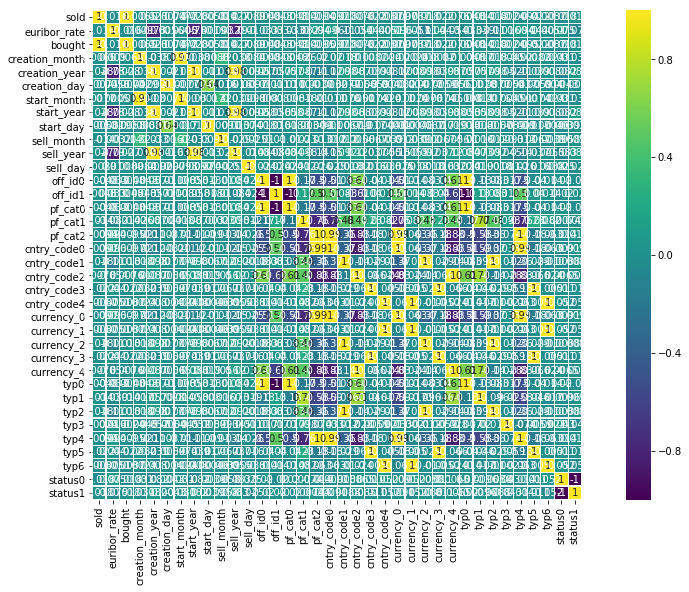

In [1479]:
plotHeatMap(pd.concat([treat_train,pd.DataFrame(treat_target)],1))

In [1480]:
len(treat_target[treat_target==True])

1898

In [1481]:
from sklearn.preprocessing import LabelEncoder

In [1482]:
le=LabelEncoder()
treat_target=le.fit_transform(treat_target)

In [1483]:
len(treat_target[treat_target!=1])

3717

In [1484]:
from sklearn.cross_validation import train_test_split
import xgboost as xgb

In [1061]:
# default parameters
params2 = {}
params2['objective'] = 'multi:softmax'
params2['eta'] = 0.3
params2['silent'] = True
params2['max_depth'] = 6
params2['subsample'] = 0.9
params2['colsample_bytree'] = 0.9
params2['nthread']=-1
params2['num_class']=2

In [1062]:
treat_train=treat_train[['euribor_rate','start_day','creation_day','sell_day','sold','sell_month','creation_month','bought','sell_year']]

In [1063]:
x_tr,x_ts,y_tr,y_ts=train_test_split(treat_train, treat_target, test_size=0.2, random_state=1996)

In [1064]:
from sklearn.metrics import mean_squared_error
def rmse(pred, dtrain):
    label = dtrain.get_label()
    acc = pow(mean_squared_error(label, pred),.5)
    return 'rmse', acc

In [1065]:
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label() 
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [1066]:
dtrain= xgb.DMatrix(data=x_tr,label=y_tr)
# dtrain= xgb.DMatrix(data=treat_train,label=treat_target)
dvalid = xgb.DMatrix(data=x_ts, label=y_ts)
# dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [1067]:
clf1_2 = xgb.train(params2, dtrain, 20000, watchlist, maximize=True, verbose_eval=50, early_stopping_rounds=140, feval=multAcc)

[0]	train-maccuracy:0.997551	valid-maccuracy:0.997329
Multiple eval metrics have been passed: 'valid-maccuracy' will be used for early stopping.

Will train until valid-maccuracy hasn't improved in 140 rounds.
[50]	train-maccuracy:1	valid-maccuracy:0.996438
[100]	train-maccuracy:1	valid-maccuracy:0.996438
Stopping. Best iteration:
[2]	train-maccuracy:0.998219	valid-maccuracy:0.998219



In [ ]:
clf1_1 = xgb.train(params, dtrain, 1150)

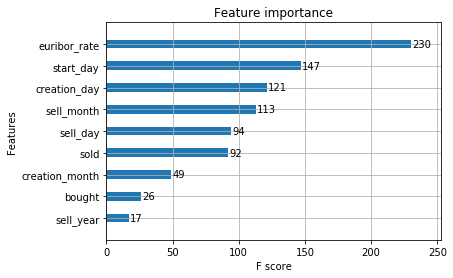

In [1037]:
xgb.plot_importance(clf1_2, ax=None, height=0.4, xlim=None,
                    ylim=None, title='Feature importance',
                    xlabel='F score', ylabel='Features',
                    importance_type='weight',
                    grid=True)
plt.figure(figsize=(14,10))
plt.show()

In [1070]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.01,n_jobs=-1,solver='sag')


In [1073]:
clf.fit(treat_train,treat_target)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [1072]:
print(accuracy_score(y_ts,clf.predict(x_ts)))

0.661620658949


In [1169]:
from ggplot import *

In [1170]:
treat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 36 columns):
sold              5615 non-null float64
euribor_rate      5615 non-null float64
bought            5615 non-null float64
creation_month    5615 non-null float64
creation_year     5615 non-null float64
creation_day      5615 non-null float64
start_month       5615 non-null float64
start_year        5615 non-null float64
start_day         5615 non-null float64
sell_month        5615 non-null float64
sell_year         5615 non-null float64
sell_day          5615 non-null float64
off_id0           5615 non-null uint8
off_id1           5615 non-null uint8
pf_cat0           5615 non-null uint8
pf_cat1           5615 non-null uint8
pf_cat2           5615 non-null uint8
cntry_code0       5615 non-null uint8
cntry_code1       5615 non-null uint8
cntry_code2       5615 non-null uint8
cntry_code3       5615 non-null uint8
cntry_code4       5615 non-null uint8
currency_0        5615 non-null u

In [1171]:
from sklearn.decomposition import PCA

In [1172]:
pca=PCA(n_components=2,svd_solver='full',random_state=142425)

In [1173]:
pc=pca.fit_transform(treat_train)

In [1174]:
sum(pca.explained_variance_ratio_)

0.99999999999999978

In [1175]:
pc

array([[  1.23095368e+08,   9.15376763e+03],
       [ -4.31979760e+06,  -9.85519832e+02],
       [ -1.98740473e+07,   9.34109766e+02],
       ..., 
       [ -4.76814707e+07,   7.94142436e+03],
       [ -3.96390588e+07,   7.81390483e+03],
       [ -1.23547853e+07,   6.56647927e+03]])

In [1176]:
pc=pd.DataFrame(np.array(pc),columns=['pca0','pca1'])

In [1177]:
pc['label']=treat_target

In [1178]:
pc.head()

,pca0,pca1,label
0,1.230954e+08,9153.767633,1
1,-4.319798e+06,-985.519832,0
2,-1.987405e+07,934.109766,0
3,6.719416e+07,-45407.045191,0
4,-7.429665e+07,9365.449248,0


In [1179]:
chart = ggplot( pc, aes(x='pca0', y='pca1', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")

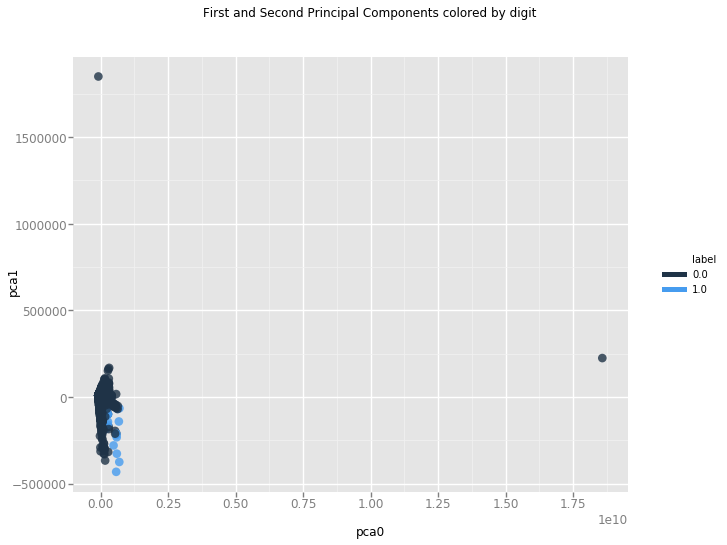

<ggplot: (84462667272)>

In [1180]:
chart

In [1074]:
import pickle

In [1075]:
pickle.dump(clf,open('random.sav','wb'))

In [1181]:
# ['euribor_rate','start_day','creation_day','sell_day','sold','sell_month','creation_month','bought','sell_year']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

sgdreg = SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))


In [1234]:
train.columns

Index(['portfolio_id', 'desk_id', 'office_id', 'pf_category', 'start_date',
       'sold', 'country_code', 'euribor_rate', 'currency', 'libor_rate',
       'bought', 'creation_date', 'indicator_code', 'sell_date', 'type',
       'hedge_value', 'status', 'return', 'creation_month', 'creation_year',
       'creation_day', 'start_month', 'start_year', 'start_day', 'sell_month',
       'sell_year', 'sell_day'],
      dtype='object')

In [1235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9361 entries, 0 to 9365
Data columns (total 27 columns):
portfolio_id      9361 non-null object
desk_id           5697 non-null object
office_id         9361 non-null object
pf_category       9361 non-null object
start_date        9361 non-null datetime64[ns]
sold              9361 non-null float64
country_code      9361 non-null object
euribor_rate      9361 non-null float64
currency          9361 non-null object
libor_rate        8889 non-null float64
bought            9361 non-null float64
creation_date     9361 non-null datetime64[ns]
indicator_code    9361 non-null bool
sell_date         9361 non-null datetime64[ns]
type              9361 non-null object
hedge_value       3665 non-null object
status            9361 non-null bool
return            9361 non-null float64
creation_month    9361 non-null float64
creation_year     9361 non-null int64
creation_day      9361 non-null float64
start_month       9361 non-null float64
start_ye

In [1348]:
train=train.sample(frac=1).reset_index(drop=True)
train[['pf_category','start_date','creation_date','sell_date','bought',
       'sold','libor_rate','euribor_rate','hedge_value','return']][train['hedge_value']==train['hedge_value']].head(100)

,pf_category,start_date,creation_date,sell_date,bought,sold,libor_rate,euribor_rate,hedge_value,return
0,C,2016-11-29,2016-11-29,2016-12-30,6.815851e+05,682000.0,-0.494991,-0.00374,False,0.00876
2,C,2013-05-24,2013-05-24,2013-06-24,1.429692e+07,14300000.0,0.223143,0.00116,True,0.00300
5,C,2014-02-03,2014-02-03,2014-06-03,1.318592e+08,132000000.0,0.200550,0.00225,True,0.00384
7,C,2017-01-26,2017-01-26,2017-02-02,1.759733e+05,176000.0,-0.480409,-0.00187,False,0.00936
8,C,2017-07-25,2017-07-25,2017-08-28,5.953525e+07,59609000.0,-0.494029,-0.00121,False,0.01572
10,B,2015-02-20,2015-02-19,2015-03-02,5.499409e+07,55000000.0,0.968658,0.00003,False,0.00672
12,B,2015-10-27,2015-10-26,2015-11-27,3.299904e+07,33000000.0,0.837866,-0.00113,False,0.00042
13,C,2016-07-29,2016-07-27,2016-08-31,8.245462e+05,825000.0,-0.560724,-0.00363,False,0.00720
15,C,2012-10-31,2012-10-31,2012-11-07,4.949750e+07,49500000.0,0.336591,0.00116,True,0.00312
16,C,2017-01-27,2017-01-27,2017-02-08,3.596290e+06,3597000.0,-0.480409,-0.00187,False,0.00948


In [ ]:
#

In [1367]:
#intersection ie common
len(train[(train['euribor_rate']<=0) & (train['hedge_value']==False) & (train['libor_rate']<=0)])

1253

In [1378]:
len(train[(train['euribor_rate']<=0) & (train['hedge_value']==True)])

0

In [1373]:
len(train[(train['euribor_rate'])>0])+len(train[(train['euribor_rate']<=0) & (train['hedge_value']==False)])==len(train)

True

In [1375]:
len(train[(train['euribor_rate'])>0])

7390

In [1377]:
len(test[(test['euribor_rate']<=0) & (test['hedge_value']!=test['hedge_value'])])

0

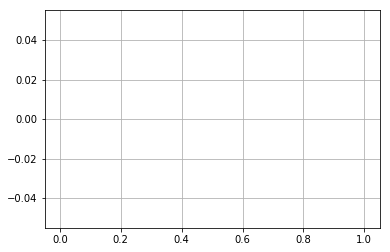

In [1412]:
plot(x='hedge_value',data=train[(train['euribor_rate']<0.001) & (train['hedge_value']!=train['hedge_value'])])

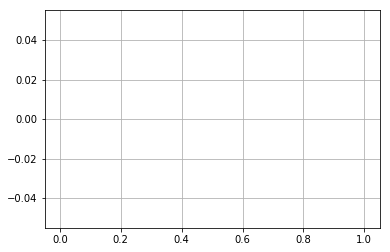

In [1411]:
plot(x='hedge_value',data=test[(test['euribor_rate']<0.001) & (test['hedge_value']!=test['hedge_value'])])

In [1380]:
len(train[(train['libor_rate']<=0) & (train['hedge_value']==False)])

1308

In [1365]:
len(train[(train['euribor_rate']<=0) & (train['hedge_value']==train['hedge_value'])])

1971

In [1364]:
len(train[(train['libor_rate']<=0) & (train['hedge_value']!=train['hedge_value'])])

0

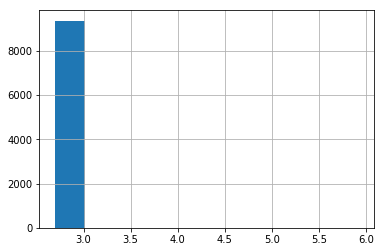

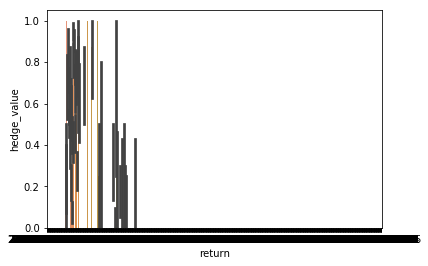

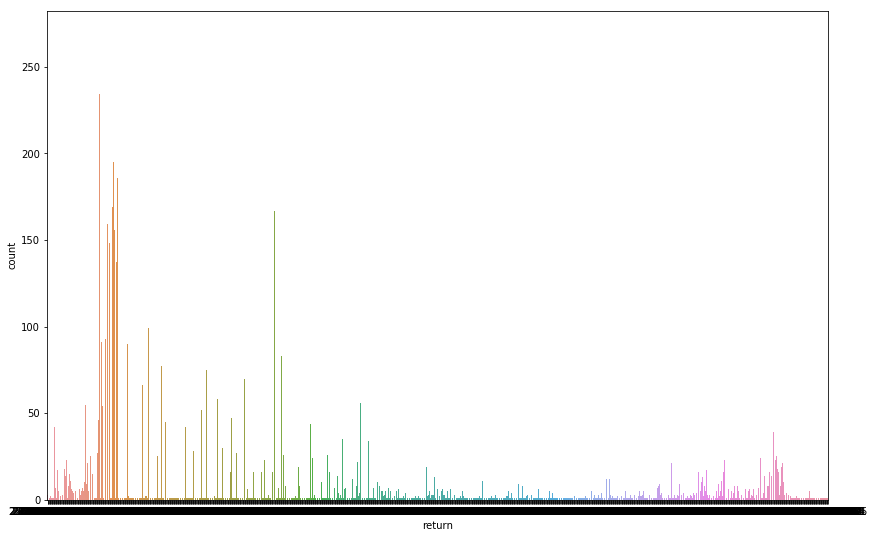

In [1427]:
train['return']=np.exp(train['return']+1)
plot(x='return',data=train,y='hedge_value',is_countplot=True,is_barplot=True)

# Feature generation

In [ ]:
pd.crosstab()